In [1]:
import os
import pickle as pkl

import pandas as pd

from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats

In [2]:
counts = pd.read_csv('Soybean_count_table_ALL.csv')
counts

,Geneid,Control_1dpi,Control_7dpi,Control_14dpi,Alternaria_1dpi,Alternaria_7dpi,Alternaria_14dpi
0,LOC100808170,1,1,1,7,2,0
1,LOC102661143,9,1,8,3,5,5
2,LOC121174904,0,0,0,0,0,0
3,LOC106794262,0,0,0,0,0,0
4,LOC100781438,13,14,14,10,9,13
...,...,...,...,...,...,...,...
54527,I638_mgp007,0,0,0,0,0,0
54528,I638_mgp006,0,0,0,0,0,0
54529,I638_mgp005,0,0,0,0,0,0
54530,I638_mgp004,0,0,0,0,0,0


In [3]:
counts = counts.set_index('Geneid')
counts

,Control_1dpi,Control_7dpi,Control_14dpi,Alternaria_1dpi,Alternaria_7dpi,Alternaria_14dpi
Geneid,,,,,,
LOC100808170,1,1,1,7,2,0
LOC102661143,9,1,8,3,5,5
LOC121174904,0,0,0,0,0,0
LOC106794262,0,0,0,0,0,0
LOC100781438,13,14,14,10,9,13
...,...,...,...,...,...,...
I638_mgp007,0,0,0,0,0,0
I638_mgp006,0,0,0,0,0,0
I638_mgp005,0,0,0,0,0,0


In [4]:
counts = counts[counts.sum(axis = 1) > 0]
counts

,Control_1dpi,Control_7dpi,Control_14dpi,Alternaria_1dpi,Alternaria_7dpi,Alternaria_14dpi
Geneid,,,,,,
LOC100808170,1,1,1,7,2,0
LOC102661143,9,1,8,3,5,5
LOC100781438,13,14,14,10,9,13
LOC100788220,10,8,13,12,10,11
LOC100779643,20,10,16,24,17,29
...,...,...,...,...,...,...
I638_mgp018,5,5,6,5,2,7
I638_mgp014,0,1,0,1,0,1
I638_mgp009,3,1,2,2,2,2


In [5]:
counts = counts.T
counts

Geneid,LOC100808170,LOC102661143,LOC100781438,LOC100788220,LOC100779643,LOC100499919,LOC100792431,LOC100783065,LOC548054,LOC100795420,...,I638_mgp021,I638_mgp060,I638_mgp020,I638_mgp019,I638_mgt016,I638_mgp018,I638_mgp014,I638_mgp009,I638_mgp008,I638_mgp003
Control_1dpi,1,9,13,10,20,45,26,3,102,5,...,1,1,3,1,0,5,0,3,1,1
Control_7dpi,1,1,14,8,10,32,33,0,190,3,...,1,3,1,2,0,5,1,1,0,0
Control_14dpi,1,8,14,13,16,27,26,3,116,7,...,3,0,0,1,0,6,0,2,0,2
Alternaria_1dpi,7,3,10,12,24,36,19,0,117,11,...,5,0,7,1,0,5,1,2,0,0
Alternaria_7dpi,2,5,9,10,17,39,15,0,88,4,...,1,1,1,1,0,2,0,2,0,0
Alternaria_14dpi,0,5,13,11,29,54,22,4,123,5,...,1,1,4,2,1,7,1,2,0,0


In [6]:
metadata = pd.DataFrame(zip(counts.index, ['Ctrl','Ctrl','Ctrl', 'Alt', 'Alt', 'Alt']),
                        columns = ['Sample', 'Condition'])

In [7]:
metadata = metadata.set_index('Sample')
metadata

,Condition
Sample,
Control_1dpi,Ctrl
Control_7dpi,Ctrl
Control_14dpi,Ctrl
Alternaria_1dpi,Alt
Alternaria_7dpi,Alt
Alternaria_14dpi,Alt


In [8]:
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=counts,
    metadata=metadata,
    design_factors="Condition",
    refit_cooks=True,
    inference=inference,
)

In [9]:
dds

AnnData object with n_obs × n_vars = 6 × 37143
    obs: 'Condition'
    obsm: 'design_matrix'

In [10]:
dds.obs

,Condition
Sample,
Control_1dpi,Ctrl
Control_7dpi,Ctrl
Control_14dpi,Ctrl
Alternaria_1dpi,Alt
Alternaria_7dpi,Alt
Alternaria_14dpi,Alt


In [11]:
dds.var

""
Geneid
LOC100808170
LOC102661143
LOC100781438
LOC100788220
LOC100779643
...
I638_mgp018
I638_mgp014
I638_mgp009


In [12]:
dds.X

array([[ 1,  9, 13, ...,  3,  1,  1],
       [ 1,  1, 14, ...,  1,  0,  0],
       [ 1,  8, 14, ...,  2,  0,  2],
       [ 7,  3, 10, ...,  2,  0,  0],
       [ 2,  5,  9, ...,  2,  0,  0],
       [ 0,  5, 13, ...,  2,  0,  0]])

In [13]:
dds.X.shape

(6, 37143)

In [14]:
dds.deseq2()

Fitting size factors...
... done in 0.03 seconds.

Fitting dispersions...
... done in 28.12 seconds.

Fitting dispersion trend curve...
... done in 5.37 seconds.

Fitting MAP dispersions...
... done in 37.10 seconds.

Fitting LFCs...
... done in 21.21 seconds.

Refitting 0 outliers.



In [15]:
dds

AnnData object with n_obs × n_vars = 6 × 37143
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var'
    obsm: 'design_matrix', 'size_factors', 'replaceable'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [16]:
#PCA
import scanpy as sc

In [17]:
sc.tl.pca(dds)

C:\Users\ukwun\anaconda3\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


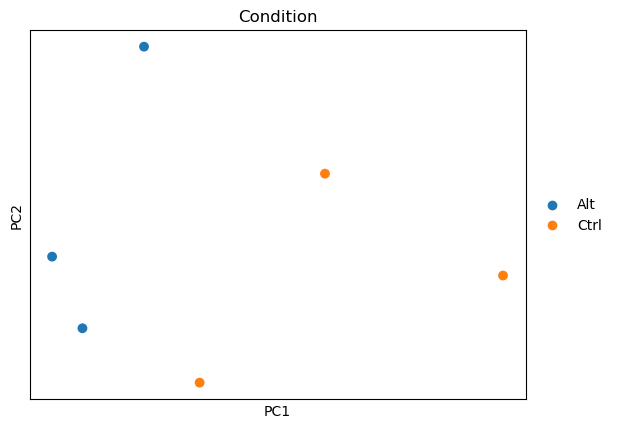

In [18]:
sc.pl.pca(dds, color = 'Condition', size = 200)

In [19]:
dds

AnnData object with n_obs × n_vars = 6 × 37143
    obs: 'Condition'
    uns: 'trend_coeffs', '_squared_logres', 'prior_disp_var', 'pca', 'Condition_colors'
    obsm: 'design_matrix', 'size_factors', 'replaceable', 'X_pca'
    varm: 'non_zero', '_MoM_dispersions', 'genewise_dispersions', '_genewise_converged', '_normed_means', 'fitted_dispersions', 'MAP_dispersions', '_MAP_converged', 'dispersions', '_outlier_genes', 'LFC', '_LFC_converged', 'replaced', 'PCs'
    layers: 'normed_counts', '_mu_hat', '_mu_LFC', '_hat_diagonals', 'cooks'

In [20]:
stat_res = DeseqStats(dds, inference=inference, contrast = ('Condition','Alt','Ctrl'))

In [21]:
stat_res.summary()

Running Wald tests...
... done in 7.99 seconds.



Log2 fold change & Wald test p-value: Condition Alt vs Ctrl
               baseMean  log2FoldChange     lfcSE      stat    pvalue  \
Geneid                                                                  
LOC100808170   2.015101        1.596244  1.287933  1.239384  0.215203   
LOC102661143   5.169727       -0.516273  0.845102 -0.610900  0.541266   
LOC100781438  11.961468       -0.381651  0.483586 -0.789210  0.429990   
LOC100788220  10.515413        0.071548  0.518746  0.137925  0.890300   
LOC100779643  19.058192        0.560904  0.505418  1.109782  0.267093   
...                 ...             ...       ...       ...       ...   
I638_mgp018    4.883100       -0.222685  0.698768 -0.318682  0.749968   
I638_mgp014    0.476935        0.870260  1.812979  0.480016  0.631216   
I638_mgp009    1.998999       -0.028193  0.969849 -0.029069  0.976809   
I638_mgp008    0.182309       -0.981534  2.405868 -0.407975  0.683292   
I638_mgp003    0.496625       -2.460123  2.207019 -1.114681  0.2

In [22]:
res = stat_res.results_df
res

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
LOC100808170,2.015101,1.596244,1.287933,1.239384,0.215203,0.999788
LOC102661143,5.169727,-0.516273,0.845102,-0.610900,0.541266,0.999788
LOC100781438,11.961468,-0.381651,0.483586,-0.789210,0.429990,0.999788
LOC100788220,10.515413,0.071548,0.518746,0.137925,0.890300,0.999788
LOC100779643,19.058192,0.560904,0.505418,1.109782,0.267093,0.999788
...,...,...,...,...,...,...
I638_mgp018,4.883100,-0.222685,0.698768,-0.318682,0.749968,0.999788
I638_mgp014,0.476935,0.870260,1.812979,0.480016,0.631216,0.999788
I638_mgp009,1.998999,-0.028193,0.969849,-0.029069,0.976809,0.999788


In [23]:
sigs = res[(res.padj < 0.05) & (abs(res.log2FoldChange) > 0.5)]
sigs

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Geneid,,,,,,
LOC100500448,2163.245972,-1.47693,0.29727,-4.968311,6.753844e-07,0.025076


In [ ]:
#Heatmap
import numpy as np
import seaborn as sns

In [ ]:
dds

In [ ]:
dds.layers['normed_counts']

In [ ]:
dds.layers['log1p'] = np.log1p(dds.layers['normed_counts'])

In [ ]:
dds.layers['log1p']

In [ ]:
sigs

In [ ]:
dds_sigs = dds[:, sigs.index]
dds_sigs

In [ ]:
grapher = pd.DataFrame(dds_sigs.layers['log1p'].T,
                       index=dds_sigs.var_names, columns=dds_sigs.obs_names)

In [ ]:
sns.clustermap(grapher, z_score=0, cmap = 'RdYlBu_r')

In [ ]:
#Volcano

In [ ]:
from bioinfokit import analys, visuz

In [ ]:
sigs

In [ ]:
visuz.GeneExpression.volcano(df=sigs, lfc='log2FoldChange', pv='pvalue',
                             color=('blue','grey','red'), 
                             show=True)

In [ ]:
sigs

In [ ]:
sigs.to_csv('expressed_gene_14dpi.csv')